In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd
import seaborn as sns

In [51]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)
#len(data) = 303

In [52]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [53]:
data["diagnosis"] = data.diagnosis.map({0:0, 1:1, 2:1, 3:1, 4:1})
data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [54]:
data_n = data.values

X = data_n[:,:-1]
y = data_n[:,-1]

#X.shape = (303,13)
y = y.reshape(len(y),1)
#y.shape = (303,1)

m = X.shape[0]

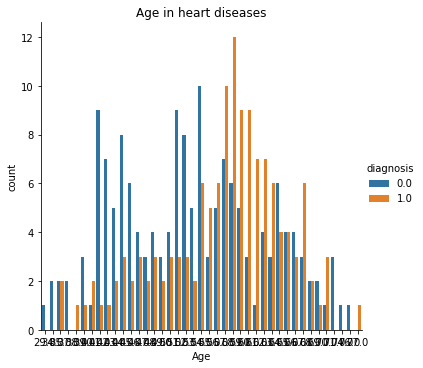

In [55]:
sns.catplot(kind = "count", data = data, x = "age", hue = "diagnosis", order = data["age"].sort_values().unique())
plt.xlabel("Age")
plt.title("Age in heart diseases")
plt.show()

In [56]:
# featureNormalization on Linear Regression
def featureNormalizationLinReg(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

# costFunction on Linear Regression
def costFunctionLinReg(X,y,theta):
    """
   Take the numpy arrays X, y, theta and return the cost function J for this theta. 

    """
    m= X.shape[0]
    h= np.dot(X,theta)
    J= 1/(2*m)*(np.sum(np.square(h-y)))

    
    return J

# gradientDescent on Linear Regression
def gradientDescentLinReg(X,y,theta,alpha,num_iters):
    """
    Take numpy arrays X, y and theta and update theta by taking num_iters gradient steps with learning rate alpha
    
     Return: theta and the list of the cost of theta (J_history) during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        h = np.dot(X,theta)
        grad = np.dot(X.transpose(),(h-y)) #Vectorized way to compute all gradients simultaneously 
        descent = np.dot(alpha,1/m * grad)
        theta= theta - descent 
        
        J_history.append(costFunctionLinReg(X,y,theta))
    
    return theta, J_history

In [57]:
X, mean_X, std_X = featureNormalizationLinReg(X)
X = np.append(np.ones((m,1)),X.reshape(m,X.shape[1]),axis=1)
initial_theta = np.zeros((X.shape[1],1))

In [64]:
alphas = [0.001, 0.01, 0.1, 0.3]
J_history_vec = []

for alpha in alphas:
    theta, J_history = gradientDescentLinReg(X,y,initial_theta,alpha,400)
    J_history_vec.append(J_history)

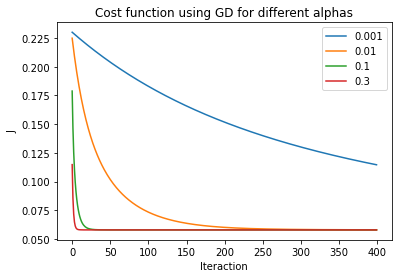

In [65]:
for i in range(len(J_history_vec)):
    plt.plot(range(400),J_history_vec[i])

plt.xlabel("Iteraction")
plt.ylabel("J")
plt.title("Cost function using GD for different alphas")
plt.legend(alphas)

In [44]:
alpha = 0.01
theta, J_history = gradientDescentLinReg(X,y,initial_theta,alpha,400)

In [45]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [47]:
p=classifierPredict(theta,X)
print("Train Accuracy:", 100*(sum(p==y)[0])/m,"%")

Train Accuracy: 54.54545454545455 %
